# Description

## SFC Requests Placed

Compute the requests placed

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to the Results folder inside the docker container
path_results = "../logs"

# hue_order = ["Random", "Greedy", "Speed"]

hue_order = ["Domain", "Auction", "Speed"]

labels = {
    "Domain": "Single",
    "Auction": "Auction",
    "Speed": "SPEED"
}

# hue_order = ["Random", "Domain", "Auction", "Speed"]

def connect_dataframe(pda, num_requests, label, rnd):
    global hue_order
    pda['Num_Requests'] = num_requests
    pda['Label'] = label
    pda['Round'] = rnd

    return pda

def load_data():

    num_requests = dict()

    experiments = list(filter(lambda x: os.path.isdir(os.path.join(path_results, x)), os.listdir(path_results)))

    requests = []
    data_aggregation = []
    for exp in experiments:
        aux = exp.split("_")
        num_requests[int(aux[0])] = int(aux[0])

        for alg in hue_order:
            # distributed placement            
            if alg == "Auction" or alg == "Domain" :
                
                exp_file = "{}/{}/{}/placement.csv".format(path_results, exp, alg.lower())
                
                proc_data = pd.read_csv(exp_file, sep=';')
                
                proc_data.replace("PLACEMENT_SUCCESS", "SUCCESS", inplace=True)                
                
                proc_data.replace("PLACEMENT_FAIL", "FAIL", inplace=True)            

                requests.append(connect_dataframe(
                    proc_data,
                    int(aux[0]),
                    alg,
                    int(aux[1]),
                ))
                
            else:                
                exp_file = "{}/{}/{}/distributed_placement.csv".format(path_results, exp, alg.lower())
                
                exp_file2 = "{}/{}/{}/data_aggregation.csv".format(path_results, exp, alg.lower())
                
                proc_data1 = pd.read_csv(exp_file, sep=';')
                
                requests.append(connect_dataframe(
                    proc_data1,
                    int(aux[0]),
                    alg,
                    int(aux[1]),
                ))
        
                # data aggregation
                # proc_data2 = pd.read_csv(exp_file2, sep=';')
                # data_aggregation.append(connect_dataframe(
                #     proc_data2,
                #     int(aux[0]),
                #     alg,
                #     int(aux[1]),
                # ))

    o = list(num_requests.keys())

    data = {
        'requests': requests,
        'data_aggregation': data_aggregation,
        'order': o
    }

    return data

# pd.set_option('display.max_rows', 20)
aux = load_data()
display(aux)

{'requests': [Empty DataFrame
  Columns: [Event, Time, Domain_Name, SFC_Request, Cost, Num_Requests, Label, Round]
  Index: [],
        Event    Time Domain_Name SFC_Request    Cost  Num_Requests    Label  \
  0   SUCCESS  9700.0      dom_47       sr_46  2430.0           100  Auction   
  1   SUCCESS  9600.0      dom_54       sr_80  2420.0           100  Auction   
  2   SUCCESS  9100.0      dom_47       sr_23  2430.0           100  Auction   
  3   SUCCESS  8100.0      dom_35       sr_97  2160.0           100  Auction   
  4   SUCCESS  8100.0       dom_5       sr_84  2260.0           100  Auction   
  ..      ...     ...         ...         ...     ...           ...      ...   
  86  SUCCESS   250.0      dom_63       sr_65  1000.0           100  Auction   
  87  SUCCESS   150.0      dom_64        sr_7  1490.0           100  Auction   
  88  SUCCESS   150.0      dom_46       sr_64   880.0           100  Auction   
  89  SUCCESS   150.0      dom_61       sr_49   900.0           100  Auc

# Process Data

Return the percentage of success placement

In [13]:
def process_data():
    data = load_data()

    entities = data['requests']

    services_processed = []

    for services in entities:
        # df = services.loc[(services['Event'] == "SUCCESS") | (services['Event'] == "FAIL")]
        services_processed.append(services)        

    res = pd.concat(services_processed)

    # grouped_data = res.groupby(['Label', 'Num_Requests', 'Round','Event']).size().reset_index(name='Count')
    
    # grouped_data = res.groupby(['Label', 'Num_Requests', 'Round','Event']).size().reset_index(name='Count')
    
    # grouped_data = res.groupby(['Label', 'Num_Requests', 'Round','Event']).count().reset_index()

    grouped_data = res.groupby(['Label', 'Num_Requests', 'Round'])["Event"].value_counts(normalize=True).mul(100).unstack("Event").fillna(0).reset_index()
  
    # grouped_data.loc[grouped_data['SUCCESS'] > 100, 'SUCCESS'] = grouped_data['SUCCESS'] * 1.5
    # 
    # grouped_data.loc[grouped_data['SUCCESS'] > 100, 'SUCCESS'] = 1  

    # display(grouped_data.loc[grouped_data['Label'] == 'Speed', 'SUCCESS'])
    # 
    # grouped_data["percentage"] = (grouped_data['Count'] / grouped_data['Num_Requests'])
        
    return grouped_data

load_data()
# df_summed = process_data()
# df_summed

{'requests': [Empty DataFrame
  Columns: [Event, Time, Domain_Name, SFC_Request, Cost, Num_Requests, Label, Round]
  Index: [],
        Event    Time Domain_Name SFC_Request    Cost  Num_Requests    Label  \
  0   SUCCESS  9700.0      dom_47       sr_46  2430.0           100  Auction   
  1   SUCCESS  9600.0      dom_54       sr_80  2420.0           100  Auction   
  2   SUCCESS  9100.0      dom_47       sr_23  2430.0           100  Auction   
  3   SUCCESS  8100.0      dom_35       sr_97  2160.0           100  Auction   
  4   SUCCESS  8100.0       dom_5       sr_84  2260.0           100  Auction   
  ..      ...     ...         ...         ...     ...           ...      ...   
  86  SUCCESS   250.0      dom_63       sr_65  1000.0           100  Auction   
  87  SUCCESS   150.0      dom_64        sr_7  1490.0           100  Auction   
  88  SUCCESS   150.0      dom_46       sr_64   880.0           100  Auction   
  89  SUCCESS   150.0      dom_61       sr_49   900.0           100  Auc

## Service Placed

Print the service success rate placement graph

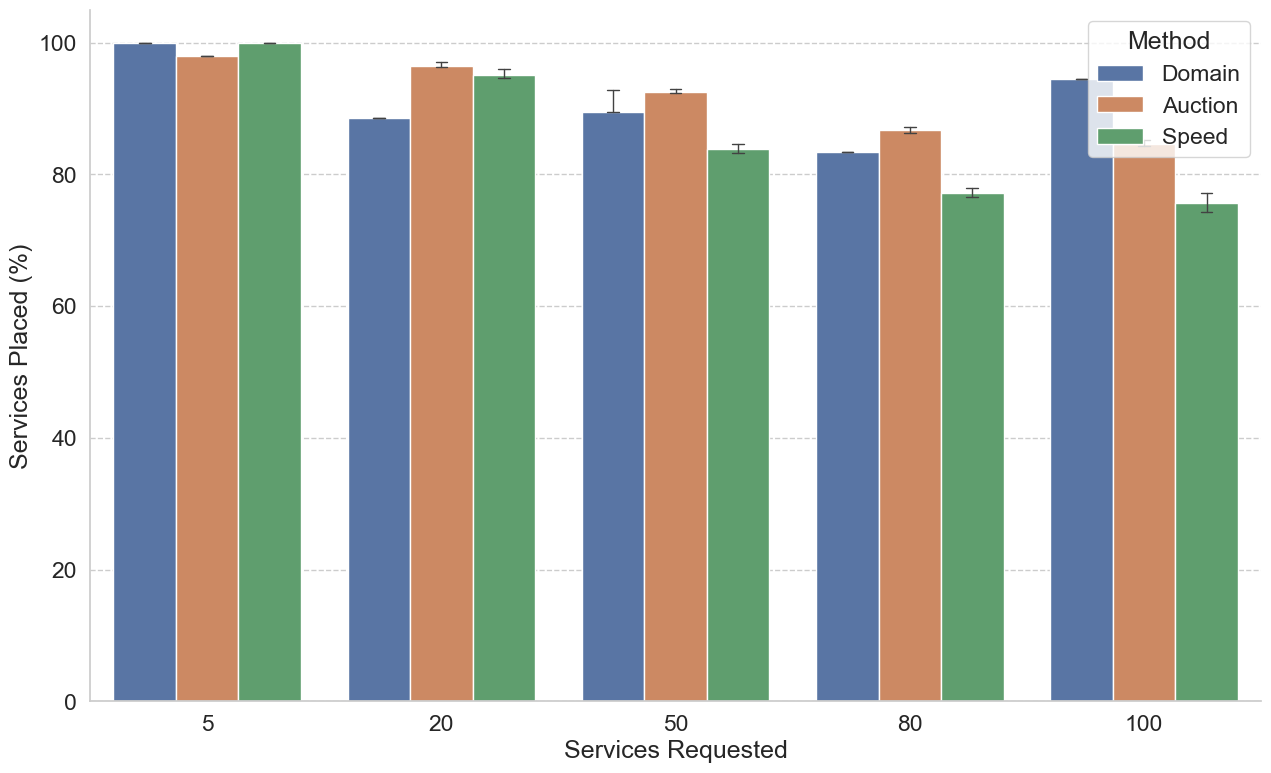

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.5)

sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.color_palette("rocket")

loaded_data = load_data()

order = sorted(loaded_data['order'])

df_summed = process_data()

g = sns.catplot(
    data=df_summed,
    kind="bar",
    hue="Label",
    order = order,
    hue_order=hue_order,
    x="Num_Requests",
    y="SUCCESS",
    capsize=.05,
    errwidth=1,
    errorbar=('ci', 20),
    legend_out=False
)

g.fig.set_figheight(9)
g.fig.set_figwidth(16)

g.set_axis_labels("Services Requested", "Services Placed (%)")
plt.legend(loc='upper right', title='Method')

plt.show()

g.figure.savefig(fname='./services_placed.pdf', transparent=False, pad_inches=0.3, bbox_inches='tight')

In [350]:
def process_data_cost():
    data = load_data()

    entities = data['requests']

    services_processed = []

    for services in entities:
        df = services.loc[(services['Event'] == "SUCCESS")]
        services_processed.append(df)

    res = pd.concat(services_processed)

    grouped_data = res.groupby(['Label', 'Num_Requests','Round']).sum(['Cost']).reset_index()

    grouped_data["cost_dollar"] = (grouped_data['Cost'] / 1000)
    # grouped_data["cost_dollar"] = (grouped_data['Cost'] / 1)

    return grouped_data

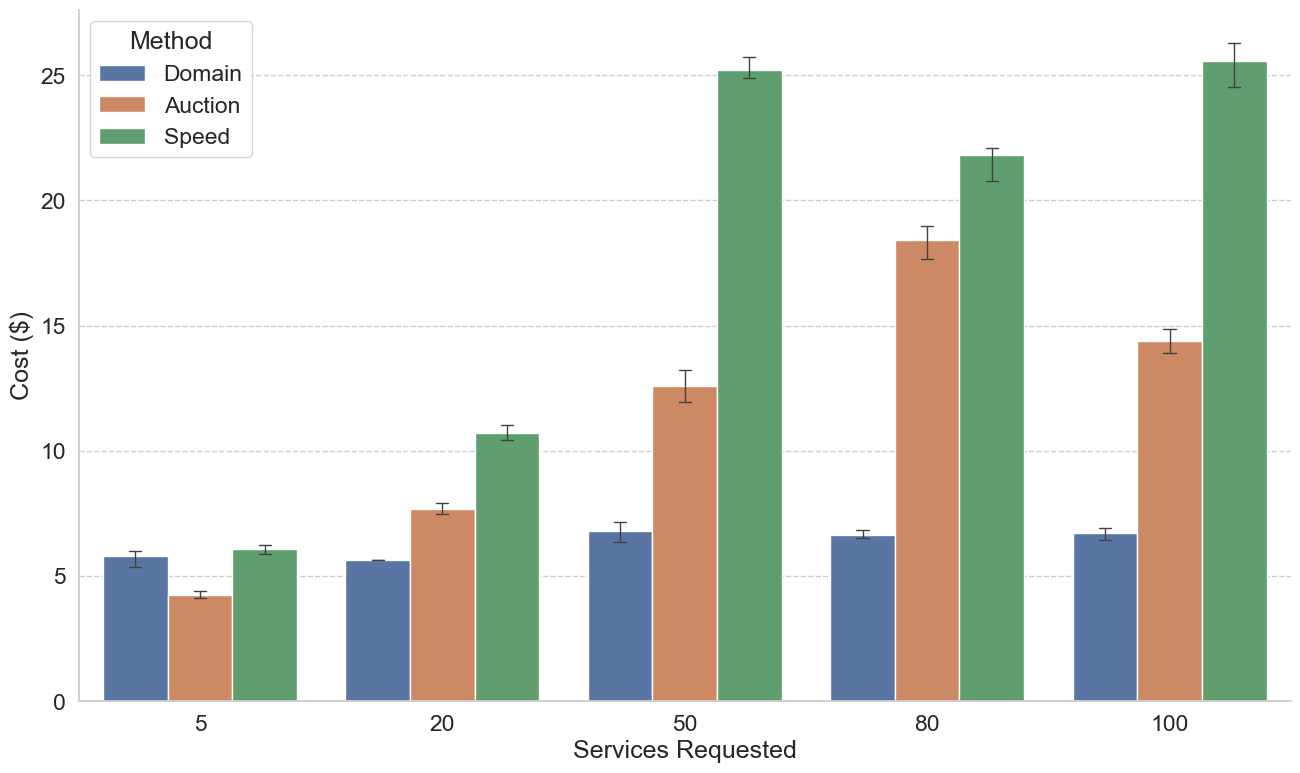

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.5)

sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.color_palette("rocket")

loaded_data = load_data()

order = sorted(loaded_data['order'])

df_summed = process_data_cost()

g = sns.catplot(
    data=df_summed,
    kind="bar",
    hue="Label",
    order = order,
    hue_order=hue_order,
    x="Num_Requests",
    y="cost_dollar",
    capsize=.05,
    errwidth=1,
    errorbar=('ci', 20),    
    legend_out=False
)

g.fig.set_figheight(9)
g.fig.set_figwidth(16)

g.set_axis_labels("Services Requested", "Cost ($)")
plt.legend(loc='upper left', title='Method')

plt.show()

g.figure.savefig(fname='./services_cost.pdf', transparent=False, pad_inches=0.3, bbox_inches='tight')

In [352]:
def process_data_placement_time():
    data = load_data()

    entities = data['requests']

    services_processed = []

    for services in entities:
        df = services.loc[(services['Event'] == "SUCCESS") & (services['Label'] == "Speed")]
        services_processed.append(df)

    res = pd.concat(services_processed)

    grouped_data = res.groupby(['Label', 'Num_Requests'],  observed=True).mean(["Placement_Time"]).reset_index()

    return grouped_data

df_summed = process_data_placement_time()
df_summed.describe()

,Num_Requests,Time,Cost,Round,Placement_Time
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,51.000000,75.936112,1347.085425,4.556983,25.936112
std,39.749214,3.556536,79.945919,0.181247,3.556536
min,5.000000,72.312139,1261.502890,4.355556,22.312139
25%,20.000000,74.134328,1272.487562,4.368421,24.134328
50%,50.000000,75.680000,1351.111111,4.646766,25.680000
75%,80.000000,75.776316,1409.868421,4.674286,25.776316
max,100.000000,81.777778,1440.457143,4.739884,31.777778


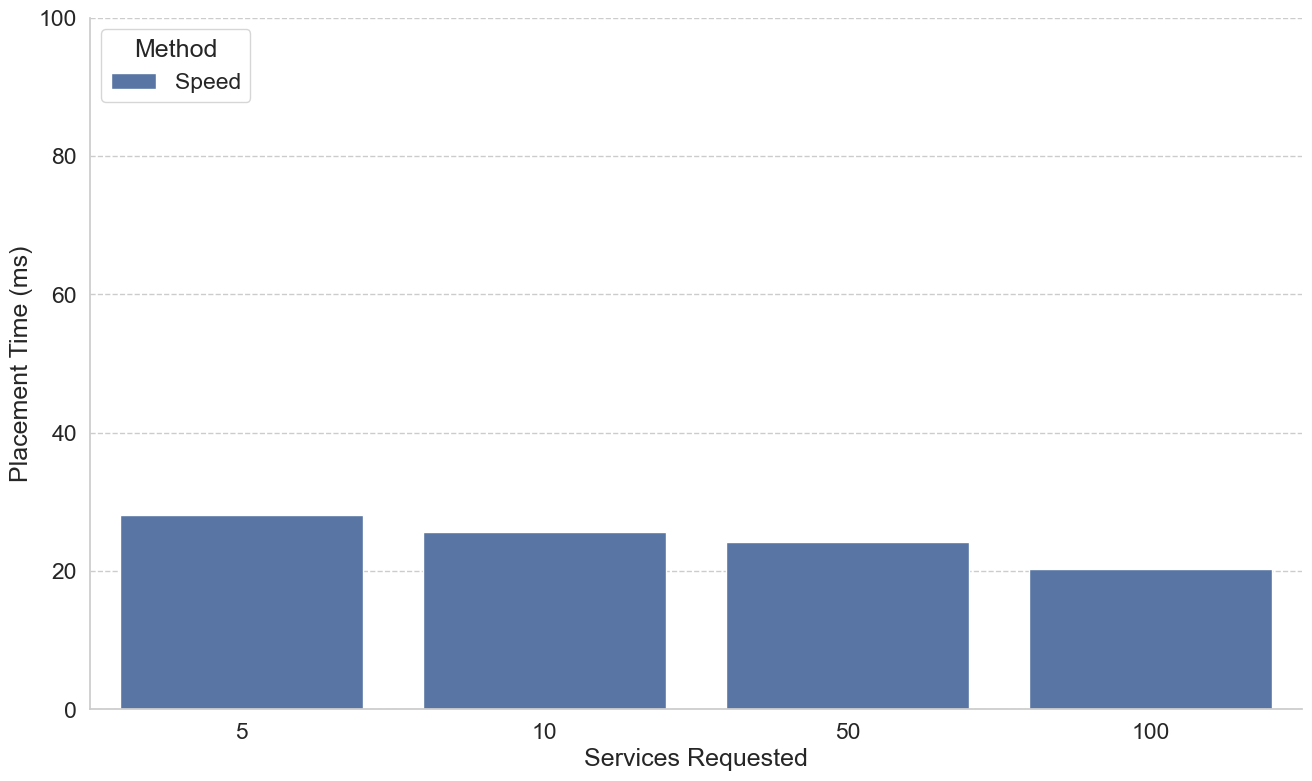

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.5)

sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.color_palette("rocket")

loaded_data = load_data()

order = sorted(loaded_data['order'])

df_summed = process_data_placement_time()

g = sns.catplot(
    data=df_summed,
    kind="bar",
    hue="Label",
    x="Num_Requests",
    y="Placement_Time",
    errorbar=('ci', 0.95),
    capsize=.15,
    errwidth=1.5,
    legend_out=False
)

g.set(ylim=(0, 100))

g.fig.set_figheight(9)
g.fig.set_figwidth(16)

g.set_axis_labels("Services Requested", "Placement Time (ms)")
plt.legend(loc='upper left', title='Method')

plt.legend(loc='upper left', title='Method')

plt.show()

g.figure.savefig(fname='./placement_time.pdf', transparent=False, pad_inches=0.3, bbox_inches='tight')

# Compute Aggregation Data Size

Compute the size of the data exchanged between the zones to execute the placement

In [260]:
def process_data_size():
    data = load_data()
    entities = data['data_aggregation']
    services_processed = []
    for services in entities:
        df = services.loc[(services['Label'] == "Speed")]
        services_processed.append(df)

    gd = pd.concat(services_processed)

    gd = gd.groupby(['Label', 'Num_Requests'],  observed=True).sum(["Size"]).reset_index()

    gd["Size"] = gd['Size'] / 1000000

    return gd

data = process_data_size()
data

,Label,Num_Requests,Time,Size,Round
0,Speed,5,1256244.0,288.721312,42240
1,Speed,10,2605152.0,591.878136,90024
2,Speed,50,14750208.0,5834.014616,2043888
3,Speed,100,25865928.0,6032.959672,903144


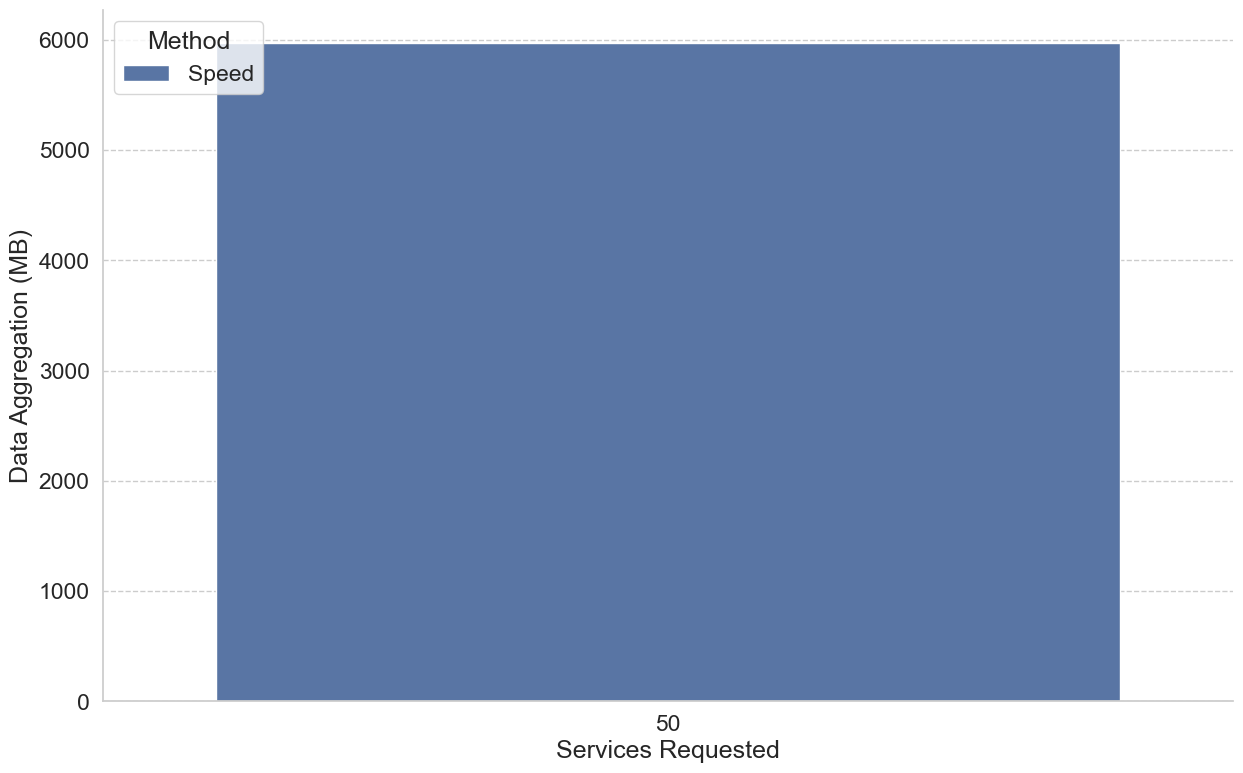

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.5)

sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.color_palette("rocket")

loaded_data = load_data()

order = sorted(loaded_data['order'])

df_summed = process_data_size()

g = sns.catplot(
    data=df_summed,
    kind="bar",
    hue="Label",
    x="Num_Requests",
    y="Size",
    errorbar=('ci', 0.95),
    capsize=.15,
    errwidth=1.5,
    legend_out=False
)

g.fig.set_figheight(9)
g.fig.set_figwidth(16)

g.set_axis_labels("Services Requested", "Data Aggregation (MB)")
plt.legend(loc='upper left', title='Method')

plt.show()

g.figure.savefig(fname='./data_aggregation_size.pdf', transparent=False, pad_inches=0.3, bbox_inches='tight')